In [1]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.11.0+cu115


In [57]:
# 生成数据集
# y = -3.27x1 + 6.54x2 + 15.93
# y = Xw + b
true_w = torch.tensor([-3.27, 6.54]).reshape(-1, 1)
true_b = 15.93

# X = torch.rand(size=(1000, 2)) * 10
X = torch.normal(size=(1000, 2), mean=5, std=2)
y = torch.matmul(X, true_w) + true_b

noise = torch.normal(mean=0, std=0.5, size=(1000, 1))
y += noise

X.size(), y.size()

(torch.Size([1000, 2]), torch.Size([1000, 1]))

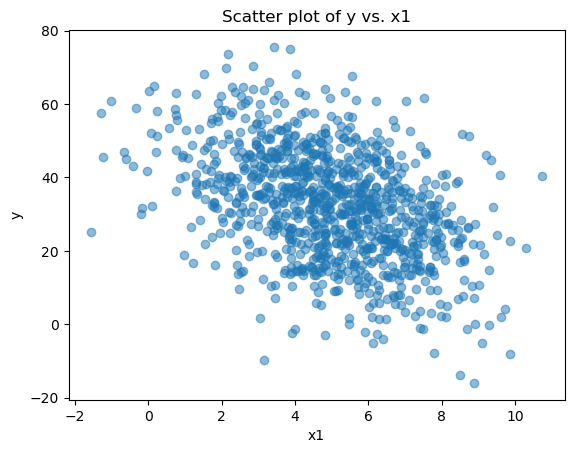

In [58]:
# alpha用来调整点的透明度
plt.scatter(X[:, 0].flatten(), y.reshape(1000, -1).numpy(), alpha=0.5)
plt.title('Scatter plot of y vs. x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

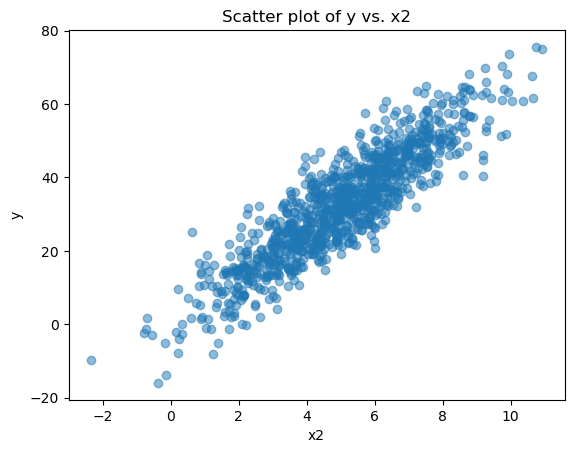

In [59]:
plt.scatter(X[:, 1].flatten(), y.reshape(1000, -1).numpy(), alpha=0.5)  # Plot the points with some transparency
plt.title('Scatter plot of y vs. x2')
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

In [63]:
def data_iter(batch_size, X, y):
    # 从数据集X, y中随机去除batch_size组
    num_examples = len(X)
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        # 防止最后一次迭代不足一个batch
        select = torch.LongTensor(idx[i: min(i + batch_size, num_examples)])
        # 0代表从第一个维度选择
        yield X.index_select(0, select), y.index_select(0, select)

In [65]:
# 检查一下迭代器
batch_size = 10
for features, labels in data_iter(batch_size, X, y):
    print(features.size(), labels.size())
    print(features)
    print(labels)
    break

torch.Size([10, 2]) torch.Size([10, 1])
tensor([[3.8642, 3.2657],
        [2.7343, 6.0319],
        [4.7823, 4.3624],
        [3.5134, 8.1633],
        [4.5290, 1.3482],
        [4.8079, 7.8816],
        [3.9598, 7.9070],
        [6.3882, 3.1863],
        [5.6732, 9.7541],
        [1.6001, 5.7015]])
tensor([[24.5929],
        [46.4259],
        [27.5580],
        [57.6442],
        [10.4126],
        [52.2149],
        [55.2897],
        [16.1065],
        [61.1454],
        [48.2730]])


In [66]:
w = torch.normal(mean=0, std=1, size=(2, 1))
b = torch.normal(mean=0, std=1, size=(1, 1))
w, b

(tensor([[-0.3421],
         [ 1.4771]]),
 tensor([[-0.8042]]))

In [67]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([[-0.8042]], requires_grad=True)

In [68]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [70]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.size())) ** 2 / 2

In [71]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [76]:
lr, num_epochs, net, loss = 0.003, 50, linreg, squared_loss

for epoch in range(num_epochs):
    for features, labels in data_iter(batch_size, X, y):
        l = loss(net(features, w, b), labels).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
    train_loss = loss(net(X, w, b), y)
    print('epoch %d: loss %f' %(epoch + 1, train_loss.mean().item()))

epoch 1: loss 0.735367
epoch 2: loss 0.704829
epoch 3: loss 0.685706
epoch 4: loss 0.667711
epoch 5: loss 0.636428
epoch 6: loss 0.608012
epoch 7: loss 0.605471
epoch 8: loss 0.566465
epoch 9: loss 0.546669
epoch 10: loss 0.528306
epoch 11: loss 0.513916
epoch 12: loss 0.492010
epoch 13: loss 0.491497
epoch 14: loss 0.462875
epoch 15: loss 0.446504
epoch 16: loss 0.432922
epoch 17: loss 0.424509
epoch 18: loss 0.406360
epoch 19: loss 0.393336
epoch 20: loss 0.381449
epoch 21: loss 0.371327
epoch 22: loss 0.360145
epoch 23: loss 0.353001
epoch 24: loss 0.339628
epoch 25: loss 0.331634
epoch 26: loss 0.320816
epoch 27: loss 0.311573
epoch 28: loss 0.304358
epoch 29: loss 0.296981
epoch 30: loss 0.289857
epoch 31: loss 0.286185
epoch 32: loss 0.277083
epoch 33: loss 0.268380
epoch 34: loss 0.265082
epoch 35: loss 0.258537
epoch 36: loss 0.251006
epoch 37: loss 0.246033
epoch 38: loss 0.243278
epoch 39: loss 0.236365
epoch 40: loss 0.233993
epoch 41: loss 0.228663
epoch 42: loss 0.226976
e

In [77]:
true_w, w

(tensor([[-3.2700],
         [ 6.5400]]),
 tensor([[-3.1579],
         [ 6.6509]], requires_grad=True))

In [78]:
true_b, b

(15.93, tensor([[14.6603]], requires_grad=True))